# Value iteration demonstration

As part of the Introduction to AI course (COMP307) at Victoria University, this is Marcus's code for running Value Iteration on the simple Grid-World example given in AIMA's exercise.

In [11]:
# setup
import numpy as np
np.set_printoptions(precision = 1)
import pylab as pl
%matplotlib inline  

ind = np.ones((3,3), dtype = int)
j=0
for r in range(3):
    for c in range(3):
        ind[r,c] = j
        j = j+1
print(ind)  # ind is a helper, just allows me to get the transition probs right, easily.

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Now set up the transition probabilities.

In [12]:
acts = ['N','S','E','W']  # possible actions

M = np.zeros(shape=(9, 9, len(acts)),dtype=float)
for r in range(3):
    for c in range(3):
        a = acts.index('N')
        M[ind[max(r-1,0),c], ind[r,c], a] += .8
        M[ind[r,max(c-1,0)], ind[r,c], a] += .1
        M[ind[r,min(c+1,2)], ind[r,c], a] += .1

        a = acts.index('S')
        M[ind[min(r+1,2),c], ind[r,c], a] += .8
        M[ind[r,max(c-1,0)], ind[r,c], a] += .1
        M[ind[r,min(c+1,2)], ind[r,c], a] += .1

        a = acts.index('E')
        M[ind[r,min(c+1,2)], ind[r,c], a] += .8
        M[ind[max(r-1,0),c], ind[r,c], a] += .1
        M[ind[min(r+1,2),c], ind[r,c], a] += .1
        
        a = acts.index('W')
        M[ind[r,max(c-1,0)], ind[r,c], a] += .8
        M[ind[max(r-1,0),c], ind[r,c], a] += .1
        M[ind[min(r+1,2),c], ind[r,c], a] += .1

## HOWEVER location 2 (top right) is an "exit": what is the transition to? 

The back-up TO that state should not change its Utility, which is just 10 in this case, no matter what follows. Simple as that!

In [3]:
print(M[:,:,0].sum(0))  # should all be 1.

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.]


And the rewards to be found in each state.

In [4]:
R = -1 * np.ones((9), dtype = int)
R[2] = 10
print (R.reshape((3,3)))

[[-1 -1 10]
 [-1 -1 -1]
 [-1 -1 -1]]


In [5]:
# Run the Value Iteration algorithm
def ValueIteration(R):
    gamma=.99
    # initialise the value function
    U = np.zeros((9), dtype=float)
    for step in range(1000):
        Unew = np.zeros((9), dtype=float) # I win no prizes for efficiency here!
        for s in range(9):
            if (s == 2):
                Unew[2] = R[2] # this one isn't updated "from the future", because it's a terminal state.
            else:
                Unew[s] = R[s] + gamma * np.dot(M[:,s,:].transpose(), U).max()
        U = Unew
    return U.reshape((3,3))

def display(R, V):
    pl.subplot(1,2,1)
    pl.imshow(R.reshape((3,3)), interpolation='nearest', cmap='gray')
    pl.axis('off')
    pl.title('r is %d' %(R[0]))
    pl.subplot(1,2,2)
    pl.imshow(V, interpolation='nearest', cmap='hot')
    pl.axis('off')
    pl.title('Optimal value function')

# Run value iteration, for various rewards offered in the top-left site.

We'll show the reward as a gray heatmap on the left, and the optimal value function as a "hot" heatmap on the right. The numbers are the actual utilities found after 1000 iterations of Value Iteration.

Note the optimal policy can be directly read off the optimal value function: you just hill-climb on it...
Oh no, wait a minute that's not quite right: we should use the value function together with the transition model to find the best action, which won't necessarily be just "towards the highest value".
However in this case it _mostly_ will be. I have been lazy and not computed or displayed the optimal policy.

[[ 8771.5  8647.5    10. ]
 [ 8647.5  8538.7  8248.3]
 [ 8526.7  8432.3  8317.4]]


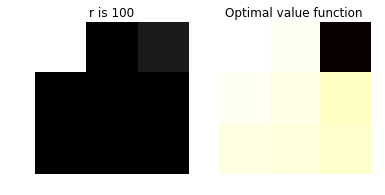

In [6]:
R[0] = 100
optimal_values = ValueIteration(R)
print(optimal_values)
display(R, optimal_values)

ie. Top-left is very valuable at r=100, so do your best to stay there. Avoid the exit!

[[  4.7   8.5  10. ]
 [  5.6   7.1   8.5]
 [  4.6   5.8   7. ]]


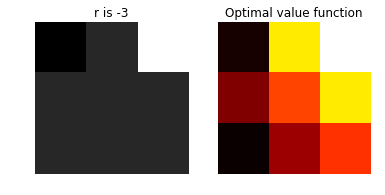

In [7]:
R[0] = -3
optimal_values = ValueIteration(R)
print(optimal_values)
display(R, optimal_values)

ie. Top-left is the worst place on earth (r=-3). Avoid it - run for the exit instead.

[[  8.2   8.5  10. ]
 [  6.9   7.2   8.5]
 [  5.6   6.    7. ]]


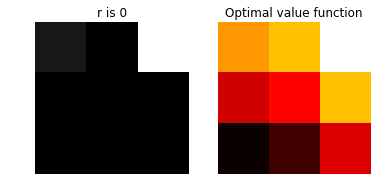

In [8]:
R[0] = 0
optimal_values = ValueIteration(R)
print (optimal_values)
display(R, optimal_values)

ie. Top-left is r=0, so is _slightly_ better than other sites. Run for the exit, but via this state if there's a choice (ie. if you've come from the lower-left of the world).

[[ 251.4  246.4   10. ]
 [ 246.4  242.1  230.6]
 [ 241.7  237.9  233.4]]


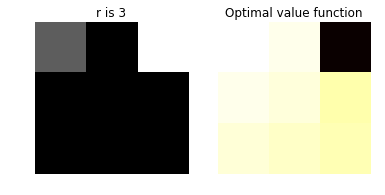

In [9]:
R[0] = 3.0
optimal_values = ValueIteration(R)
print (optimal_values)
display(R, optimal_values)

Interestingly, this reward is well below the "exit" reward, but then you can _stay there and get even more_. The optimal policy is to do that, avoiding the exit. You might wonder what value R would have to be for the policy to "flip" to exiting the building, which it must do at some critical value. That turns out to be 1.0 - try it out!